# Föreläsning 7

* Linjär regression - Least Squares
    * Exempel - iris
* Transformation med linjär regression
    * Exempel - iris
* Residualanalys
* (Polynomisk regression)

# Regression

Regression är en vanlig metod för att bygga en modell som förutsäger en kontinuerlig variabel. Det enklaste fallet av regression är linjär regression, där vi försöker anpassa en linje till våra data. 

## Linjär regression
Linjär regression beräknas genom att minimera summan av kvadrat av avståndet mellan punkterna och linjen. Detta kallas för minsta kvadratmetoden.

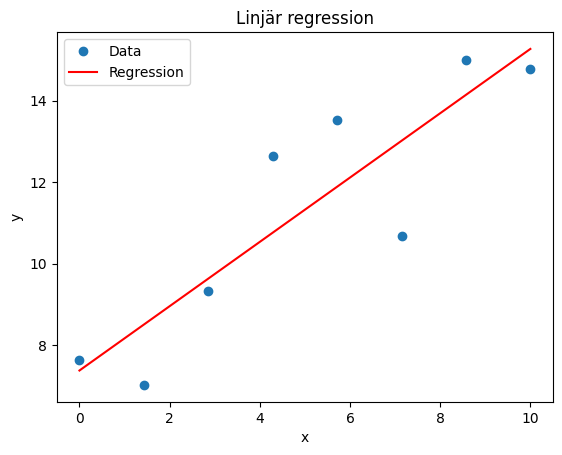

In [35]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Visualisera least squares regression

import numpy as np
import matplotlib.pyplot as plt

# Genera data med brus
n = 8
x = np.linspace(0, 10, n)
seed = 0
np.random.seed(seed)
y = x + 5 + 1.5 * np.random.randn(n)

# Beräkna minsta kvadrat
A = np.vstack([x, np.ones(len(x))]).T
b, a = np.linalg.lstsq(A, y, rcond=None)[0]


# Plot data och regression
plt.plot(x, y, 'o', label='Data')
plt.plot(x, a + b*x, 'r', label='Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linjär regression')
plt.legend()
plt.show()

Hur fungerar det? Vi har en linje som beskrivs av följande ekvation:

$$y = a + bx$$

Vi vill hitta de bästa värdena för $a$ och $b$ som passar våra data. Vi kan göra detta genom att minimera summan av kvadrat av avståndet mellan punkterna och linjen. Detta kallas för minsta kvadratmetoden.

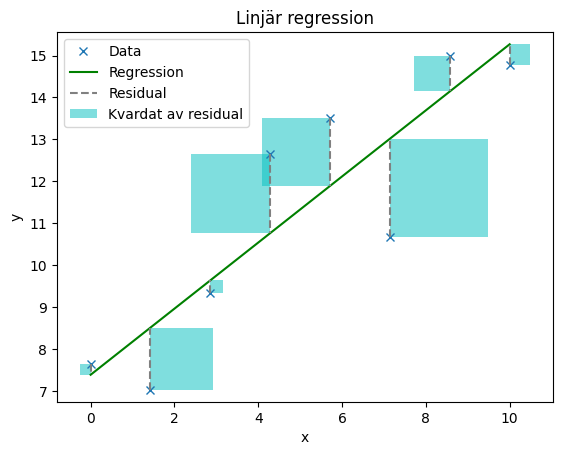

In [36]:
# Calucalte residual 
residual = y - (a + b*x)

# Plot residual in regression plot
plt.plot(x, y, 'x', label='Data')
plt.plot(x, a + b*x, 'g', label='Regression')

# Plot residual as vertical lines between data and regression
for i in range(n):
    plt.vlines(x[i], y[i], a + b*x[i], linestyles='dashed', color='gray')

    # Plot square of residual
    rectangles = plt.Rectangle((x[i], y[i]), -residual[i], -residual[i], fc='c', alpha=0.5)
    plt.gca().add_patch(rectangles)


plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linjär regression')
plt.legend(['Data', 'Regression', 'Residual', 'Kvardat av residual'])
plt.show()




## Regression riktig data

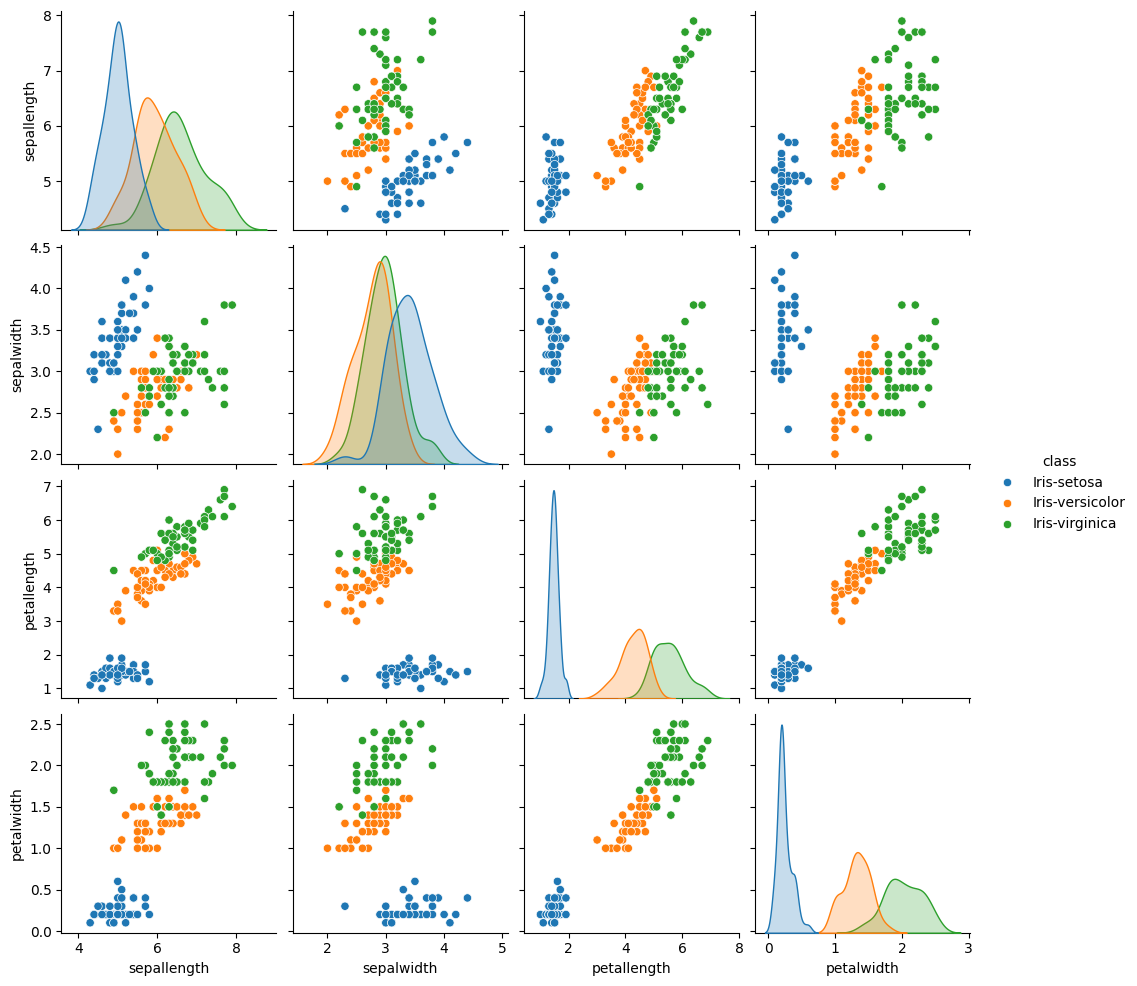

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load csv file
df_iris = pd.read_csv('../data/iris.csv')

# Visalize pairwise relationships in a dataset filtered on class
sns.pairplot(df_iris, hue='class')

Det verkar som kronbladslängden (petal length) mot kronbladsbredden (petal width) har ett linjärt förhållande. 

Låt oss se hur vi kan använda linjär regression för att anpassa en linje till våra data. Denna model kommer då att kunna användas för att göra förutsägelser om kronbladslängden för en viss kronbladsbredd.



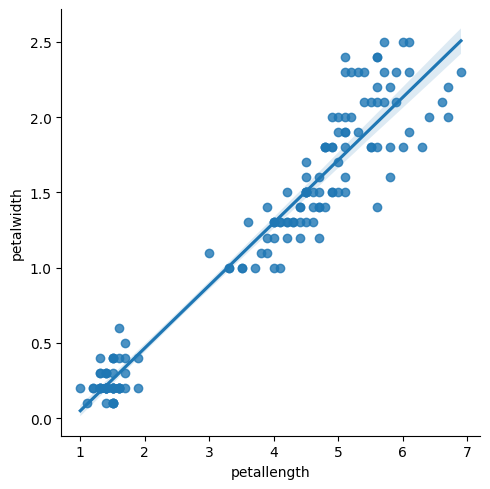

In [38]:
# Bygg linjär regression av kronbladslängd mot kronbladsbredd
sns.lmplot(x='petallength', y='petalwidth', data=df_iris)


För att utvärdera hur bra vår modell förutser ny data kan vi dela in vårt dataset i två delar. En del som vi använder för att träna vår modell och en del som vi använder för att testa vår modell. Vi kan sedan jämföra de verkliga värdena med de förutsagda värdena för att se hur bra vår modell fungerar.

Mean squared error: 0.04436203570872088


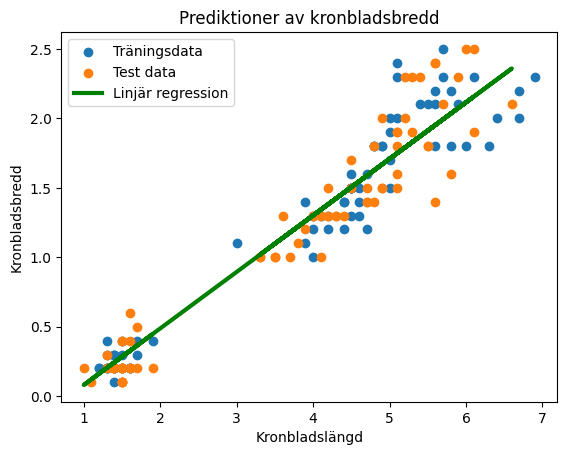

In [39]:
from sklearn.linear_model import LinearRegression
# split data into train and test
propotion_train = 0.5
train = df_iris.sample(frac=propotion_train, random_state=1)
test = df_iris.drop(train.index)

# Bygg linjär regression av kronbladslängd mot kronbladsbredd
# Använd train data
model = LinearRegression().fit(train[['petallength']], train['petalwidth'])

# Prediktera med test data
pred = model.predict(test[['petallength']])

# Räkna ut MSE
mse = np.mean((pred - test['petalwidth'])**2)
print("Mean squared error:", mse)

# Visalisera prediktioner
plt.scatter(train['petallength'], train['petalwidth'], label='Träningsdata')
plt.scatter(test['petallength'], test['petalwidth'], label='Test data')
plt.plot(test['petallength'], pred, label='Linjär regression', color='g', linewidth=3)
plt.legend()
plt.title("Prediktioner av kronbladsbredd")
plt.xlabel("Kronbladslängd")
plt.ylabel("Kronbladsbredd")
plt.show()


Låt oss titta på residualen av våra data. Residualen är avståndet mellan punkten och linjen. Om residualen är positiv betyder det att punkten ligger över linjen. Om residualen är negativ betyder det att punkten ligger under linjen. Om residualen är noll betyder det att punkten ligger på linjen.

Standardavvikelsen för residualen: 0.21


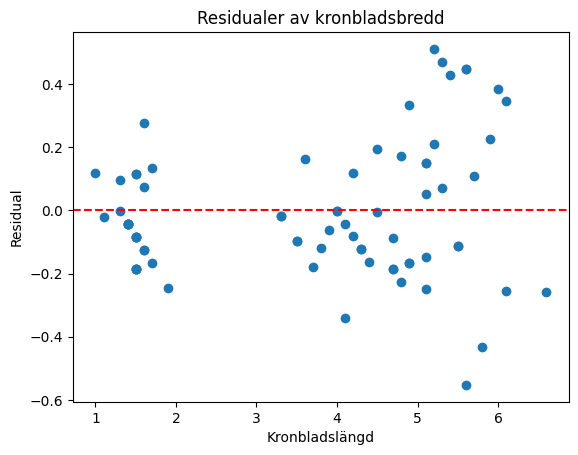

In [40]:
# Beräkna residualen för test data
residual = test['petalwidth'] - pred

# Beräkna standardavvikelsen för residualen
std_residual = np.std(residual)
print(f"Standardavvikelsen för residualen: {std_residual:.2f}")

# Visualisera residualen för test data
plt.scatter(test['petallength'], residual)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residualer av kronbladsbredd")
plt.xlabel("Kronbladslängd")
plt.ylabel("Residual")
plt.show()


Ett annat sätt att utvärdera modellen är att titta på residualens fördelning. 

Om residualerna är normalfördelade betyder det att de är oberoende av varandra och att de har en konstant varians. Denna egenskap brukar ibland beskrivas som att residualerna ska innehålla vitt brus. Om residualerna är normalfördelade kan vi använda oss av statistiska test för att utvärdera hur bra vår modell fungerar.

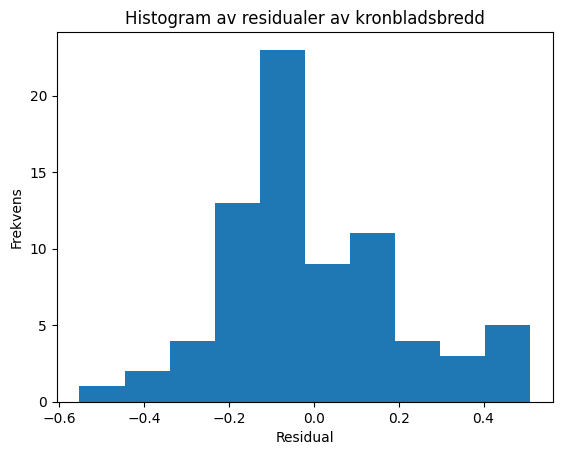

In [41]:
# Visa histogram av residualen för test data
plt.hist(residual, bins=10)
plt.title("Histogram av residualer av kronbladsbredd")
plt.xlabel("Residual")
plt.ylabel("Frekvens")
plt.show()


## Transformation
Ett vanligt sätt att göra data mer normalfördelad och bättre för linjär regression är genom att använda en transformation. Detta kan vara en logaritmisk transformation, en kvadratisk transformation, en kubisk transformation, eller någon annan transformation. Detta är en bra metod för att göra data mer normalfördelad och bättre för linjär regression.

### Logaritmisk transformation

En logaritmisk transformation är en transformation som använder logaritmen av ett tal. Detta kan användas för att göra data mer normalfördelad och bättre för linjär regression. Låt oss titta på ett exempel.

Låt oss titta på hur kronbladslängden (petal length) mot kronbladsbredden (petal width) ser ut när vi använder en logaritmisk transformation på kronbladslängden.

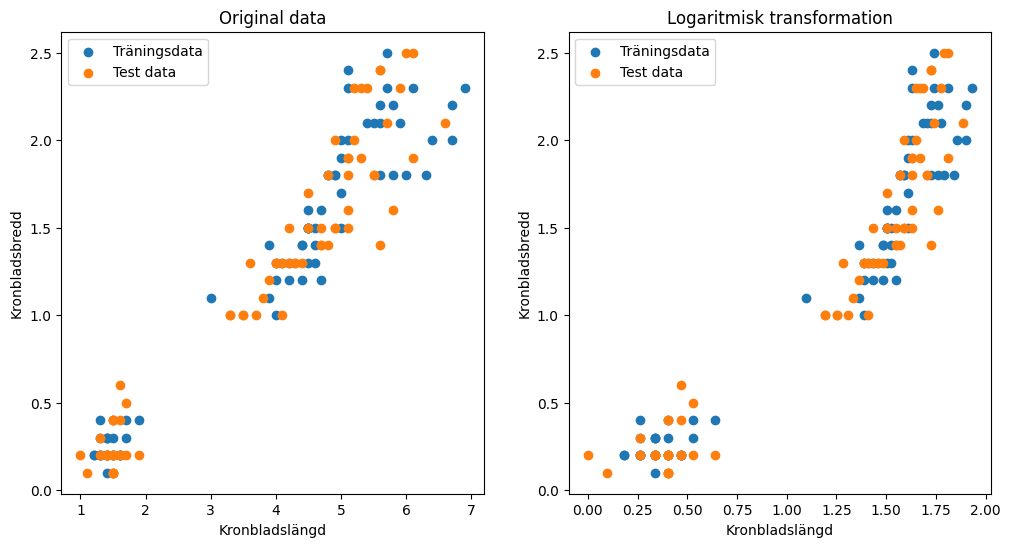

In [42]:
# Transformera med en logaritmisk funktion och utför en linjär regression + residual analys
# Logaritmisk transformation
train['petallength_log'] = np.log(train['petallength'])
test['petallength_log'] = np.log(test['petallength'])

# Visualisera logaritmisk transformation
plt.figure(figsize=(12, 6))

# Visa original data i subplot 1
plt.subplot(1, 2, 1)
plt.scatter(train['petallength'], train['petalwidth'], label='Träningsdata')
plt.scatter(test['petallength'], test['petalwidth'], label='Test data')
plt.legend()
plt.title("Original data")
plt.xlabel("Kronbladslängd")
plt.ylabel("Kronbladsbredd")

# Visa logaritmisk transformation i subplot 2
plt.subplot(1, 2, 2)
plt.scatter(train['petallength_log'], train['petalwidth'], label='Träningsdata')
plt.scatter(test['petallength_log'], test['petalwidth'], label='Test data')
plt.legend()
plt.title("Logaritmisk transformation")
plt.xlabel("Kronbladslängd")
plt.ylabel("Kronbladsbredd")
plt.show()

Utifrån hur det transformerade datat fördelat sig misstänker jag att det inte finns ett expoentiellt förhållande mellan kronbladslängden och kronbladsbredden. 

Vi fortsätter dock exemplet för att avgöra hur bra en logaritmisk transformation fungerar och utvärderar de olika modellerna. 

Mean squared error log transformerad: 0.06573998042675533
Mean squared error linjär regression: 0.04436203570872088


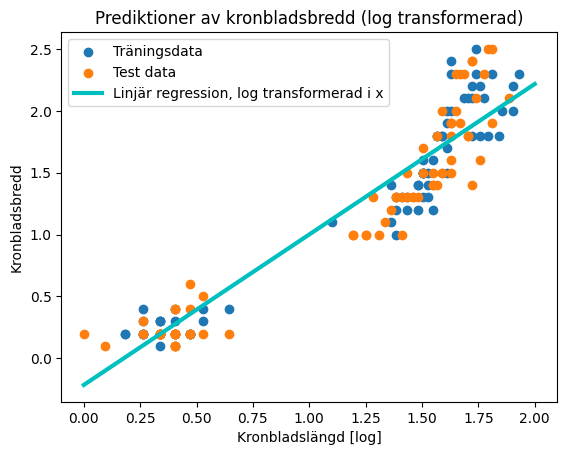

In [43]:
# Bygg linjär regression av logaritmerad data
log_model = LinearRegression()
log_model.fit(train[['petallength_log']], train['petalwidth'])


# Prediktera med test data
pred_log = log_model.predict(test[['petallength_log']])

x_log = np.linspace(0, 2, 100)
draw_exp_model = log_model.predict(x_log.reshape(-1, 1))

# Räkna ut MSE
mse_log = np.mean((pred_log - test['petalwidth'])**2)
print("Mean squared error log transformerad:", mse_log)
print("Mean squared error linjär regression:", mse)

# Visalisera prediktioner
plt.scatter(train['petallength_log'], train['petalwidth'], label='Träningsdata')
plt.scatter(test['petallength_log'], test['petalwidth'], label='Test data')
plt.plot(x_log, draw_exp_model, label='Linjär regression, log transformerad i x', color='c', linewidth=3)
plt.legend()
plt.title("Prediktioner av kronbladsbredd (log transformerad)")
plt.xlabel("Kronbladslängd [log]")
plt.ylabel("Kronbladsbredd")
plt.show()


Här ser vi den linjära modell som vi anpassar till den transformerade datan. 

Vi kan också se att vårt Mean Square Error (MSE) är högre för den transformerade datan.

#### Transformera tillbaka
Då vi i detta exempel transformerat kronbladslängden (X) till logaritmisk skala kan vi transformera tillbaka till den ursprungliga formen genom att använda exponenten.

$$ X_{\text{original}} = e^{X_{log}}$$

Plotta sedan prediktionerna mot $X_{\text{original}}$:

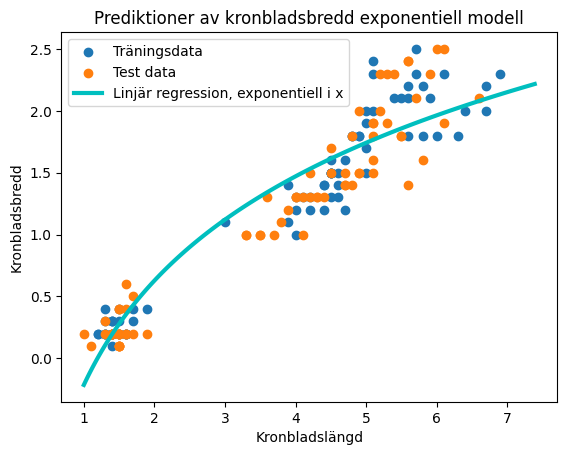

In [44]:
# Transformera tillbaka modellen

plt.scatter(train['petallength'], train['petalwidth'], label='Träningsdata')
plt.scatter(test['petallength'], test['petalwidth'], label='Test data')
plt.plot(np.exp(x_log), draw_exp_model, label='Linjär regression, exponentiell i x', color='c', linewidth=3)
plt.legend()
plt.title("Prediktioner av kronbladsbredd exponentiell modell")
plt.xlabel("Kronbladslängd")
plt.ylabel("Kronbladsbredd")
plt.show()

### Transformera $y$-variabeln

Istället för att transformera $X$-variabeln kan vi transformera $y$-variabeln. Detta passar då vi har en exponentiell relation mellan $X$ och $y$. Modellen får du utseendet:

$$ y = \beta_0 e^{\beta_1 X}$$

Efter logaritmering av $y$-variabeln får vi:

$$ \log(y) = \beta_0 + \beta_1 X$$

Vilket är en linjär modell.


Mean squared error log transformerad y: 0.13579007820446617
Mean squared error log transformerad x: 0.06573998042675533
Mean squared error linjär regression: 0.04436203570872088


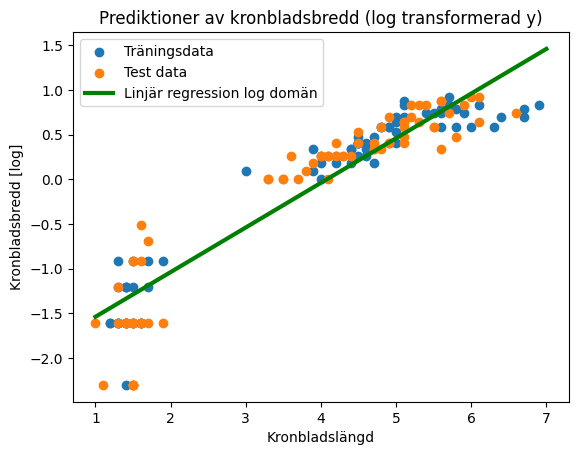

In [45]:
# Expoenetiell modell i y
train['petalwidth_log'] = np.log(train['petalwidth'])
test['petalwidth_log'] = np.log(test['petalwidth'])

# Bygg linjär regression av logaritmerad data
log_y_model = LinearRegression()
log_y_model.fit(train[['petallength']], train['petalwidth_log'])

# Prediktera med test data
pred_log_y = log_y_model.predict(test[['petallength']])
# pred_log_y = np.exp(pred_log_y)

# Räkna ut MSE
mse_log_y = np.mean((pred_log_y - test['petalwidth_log'])**2)
print("Mean squared error log transformerad y:", mse_log_y)
print("Mean squared error log transformerad x:", mse_log)
print("Mean squared error linjär regression:", mse)

# Visalisera prediktioner
x = np.linspace(1, 7, 100)
y_log = log_y_model.predict(x.reshape(-1, 1))

plt.scatter(train['petallength'], train['petalwidth_log'], label='Träningsdata')
plt.scatter(test['petallength'], test['petalwidth_log'], label='Test data')
plt.plot(x, y_log, label='Linjär regression log domän', color='g', linewidth=3)
plt.legend()
plt.title("Prediktioner av kronbladsbredd (log transformerad y)")
plt.xlabel("Kronbladslängd")
plt.ylabel("Kronbladsbredd [log]")
plt.show()


#### OBS! Residualen!

Residualen definieras som:

$$ R = y - \hat{y}$$

där $\hat{y}$ är prediktionen av $y$-variabeln. Men då vi nu har logaritmerat modellen får vi residualen

$$ R_{log} = \log(y) - \log\hat{(y)}$$

Denna går inte att direkt jämföra med den ursprungliga residualen. Vi måste därför transformera tillbaka residualen till den ursprungliga formen. Detta görs genom att använda exponenten.

$$ R = y - e^{\log\hat{(y)}}$$

MSE av kronbladsbredd (exponentiell modell i y): 0.1016170334104657
Mse av kronbladsbredd (log transformerad x): 0.06573998042675533
Mse av kronbladsbredd (linjär regression): 0.04436203570872088


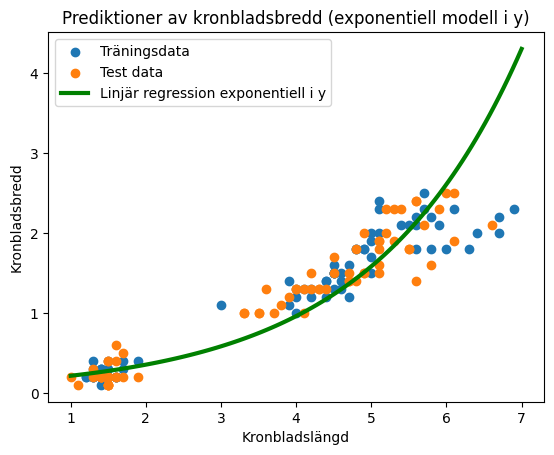

In [46]:
# Beräkna residualer
residual_log_y = test['petalwidth'] - np.exp(pred_log_y)

# Skriv ut MSE
mse_exp_y = np.mean(residual_log_y**2)
print(f"MSE av kronbladsbredd (exponentiell modell i y): {mse_exp_y}")
print(f"Mse av kronbladsbredd (log transformerad x): {mse_log}")
print(f"Mse av kronbladsbredd (linjär regression): {mse}")

# Visualisera exponential modell i y
plt.scatter(train['petallength'], train['petalwidth'], label='Träningsdata')
plt.scatter(test['petallength'], test['petalwidth'], label='Test data')
plt.plot(x, np.exp(y_log), label='Linjär regression exponentiell i y', color='g', linewidth=3)
plt.legend()
plt.title("Prediktioner av kronbladsbredd (exponentiell modell i y)")
plt.xlabel("Kronbladslängd")
plt.ylabel("Kronbladsbredd")
plt.show()



### Log-log transformation

En log-log transformation är en transformation som använder logaritmen av båda talen. Detta kan användas för att göra data mer normalfördelad och bättre för linjär regression. 

Mean squared error log-log transformerad: 0.04436262958633095
Mean squared error linjär regression:     0.04436203570872088
Mean squared error log transformerad y:   0.1016170334104657
Mean squared error log transformerad x:   0.06573998042675533


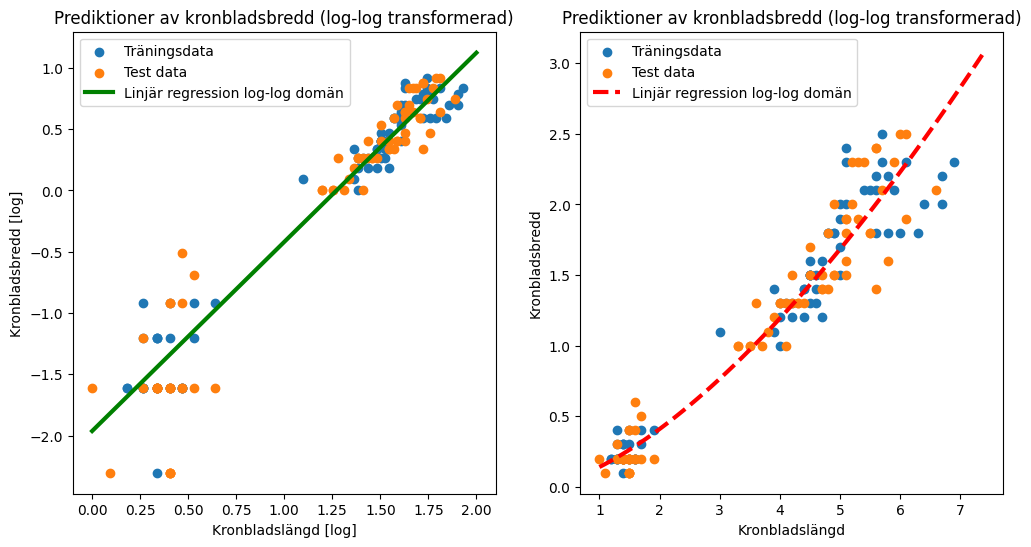

In [47]:
# Log-log modell
log_log_model = LinearRegression()
log_log_model.fit(train[['petallength_log']], train['petalwidth_log'])

# Prediktera med test data
pred_log_log = log_log_model.predict(test[['petallength_log']])
pred_log_log_back = np.exp(pred_log_log)

# Räkna ut MSE
mse_log_log = np.mean((pred_log_log_back - test['petalwidth'])**2)
print("Mean squared error log-log transformerad:", mse_log_log)
print("Mean squared error linjär regression:    ", mse)
print("Mean squared error log transformerad y:  ", mse_exp_y)
print("Mean squared error log transformerad x:  ", mse_log)

# Visalisera prediktioner
x_log = np.linspace(0, 2, 100)
y_log_log = log_log_model.predict(x_log.reshape(-1, 1))

# set figure size
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)

plt.scatter(train['petallength_log'], train['petalwidth_log'], label='Träningsdata')
plt.scatter(test['petallength_log'], test['petalwidth_log'], label='Test data')
plt.plot(x_log, y_log_log, label='Linjär regression log-log domän', color='g', linewidth=3)
plt.legend()
plt.title("Prediktioner av kronbladsbredd (log-log transformerad)")
plt.xlabel("Kronbladslängd [log]")
plt.ylabel("Kronbladsbredd [log]")

plt.subplot(1,2,2)
plt.scatter(train['petallength'], train['petalwidth'], label='Träningsdata')
plt.scatter(test['petallength'], test['petalwidth'], label='Test data')
plt.plot(np.exp(x_log), np.exp(y_log_log), label='Linjär regression log-log domän', color='r', linewidth=3, linestyle='--')
plt.legend()
plt.title("Prediktioner av kronbladsbredd (log-log transformerad)")
plt.xlabel("Kronbladslängd")
plt.ylabel("Kronbladsbredd")

plt.show()

#### Jämför alla modellerna

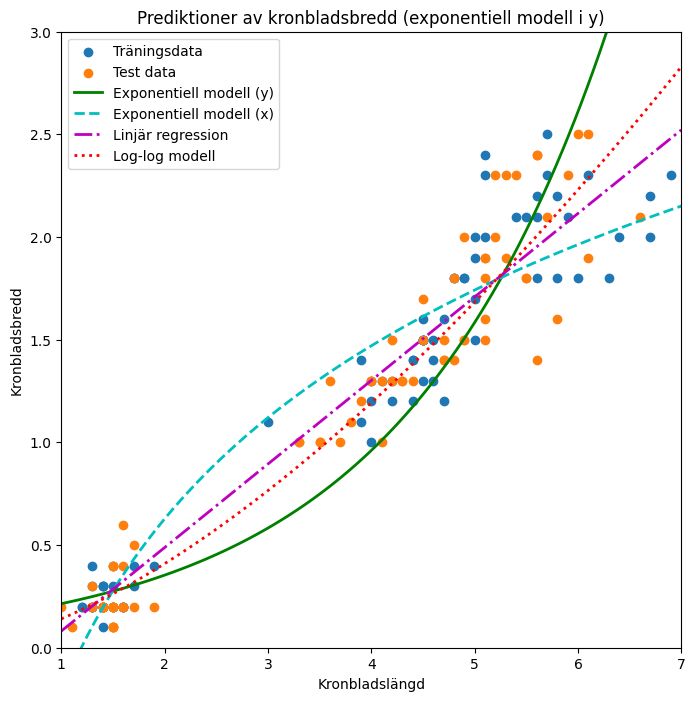

In [48]:
# Visualisera samtliga modeller
plt.figure(figsize=(8, 8))

plt.scatter(train['petallength'], train['petalwidth'], label='Träningsdata')
plt.scatter(test['petallength'], test['petalwidth'], label='Test data')

plt.plot(x, np.exp(y_log), label='Exponentiell modell (y)', color='g', linewidth=2)
plt.plot(np.exp(x_log), draw_exp_model, label='Exponentiell modell (x)', color='c', linewidth=2, linestyle='--')
plt.plot(x, model.predict(x.reshape(-1, 1)), label='Linjär regression', color='m', linewidth=2, linestyle='-.')
plt.plot(np.exp(x_log), np.exp(y_log_log), label='Log-log modell', color='r', linewidth=2, linestyle=':')

plt.legend()
plt.title("Prediktioner av kronbladsbredd (exponentiell modell i y)")
plt.xlabel("Kronbladslängd")
plt.ylabel("Kronbladsbredd")
plt.xlim(1, 7)
plt.ylim(0, 3)
plt.show()

## Vilken modell är bäst?

Som vi sett på MSE värdena (och på modellerna ovan) så berkar en vanlig linljär regression och log-log modellen vara bäst anpassad till datat.

Låt oss titta på några ytterligare sett att utvärdera hur bra modellerna fungerar.

### Residual varians

Residual varians är en annan mått på hur bra en modell förklarar variationen i datat. Detta mått är vanligtvis mellan 0 och 1. Ju närmare 1 desto bättre förklarar modellen variationen i datat.

$$ \text{Var}(R) = \frac{1}{n-k} \sum_{i=1}^n (y_i - \hat{y}_i)^2 = MSE$$

Där:

* $n$ är antalet observationer i data uppsättningen
* $k$ är antalet parametrar i modellen (i detta fall 2, då $y = \underline{a} + \underline{b} X$)
* $\hat y$ är predikterade värden
* $y$ är de faktiska värdena

Denna varians vill man att ska vara så liten som möjligt.

### R-squared

R-squared är ett mått på hur bra en modell förklarar variationen i datat. Detta mått är vanligtvis mellan 0 och 1. Ju närmare 1 desto bättre förklarar modellen variationen i datat.

$$ R^2 = 1 - \frac{MSE}{\text{Var}(y)}$$


In [49]:
# Residualvarians för test data
k = 2
n = len(test)

# Beräkna residualvarians
residual_var_linjär = np.sum((test['petalwidth'] - model.predict(test[['petallength']]))**2) / (n - k )
residual_var_exp_y = np.sum((test['petalwidth'] - np.exp(pred_log_y))**2) / (n - k )
residual_var_exp_x = np.sum((test['petalwidth'] - pred_log)**2) / (n - k )
residual_var_log_log = np.sum((test['petalwidth'] - pred_log_log_back)**2) / (n - k )

# Räkna ut R^2
var_y = np.var(test['petalwidth'])
r2_linjär = 1 - residual_var_linjär / var_y
r2_exp_y = 1 - residual_var_exp_y / var_y
r2_exp_x = 1 - residual_var_exp_x / var_y
r2_log_log = 1 - residual_var_log_log / var_y


# ----- Printa residualvarians ----- 
print("Var(R)")
print("Residualvarians för log-log modell:         ", residual_var_log_log)
print("Residualvarians för linjär regression:      ", residual_var_linjär)
print("Residualvarians för exponentiell modell i y:", residual_var_exp_y)
print("Residualvarians för exponentiell modell i x:", residual_var_exp_x)

# -----  Printa R^2 ----- 
print("\nR^2:")
print("R^2 för log-log modell:         ", r2_log_log)
print("R^2 för linjär regression:      ", r2_linjär)
print("R^2 för exponentiell modell i y:", r2_exp_y)
print("R^2 för exponentiell modell i x:", r2_exp_x)



Var(R)
Residualvarians för log-log modell:          0.0455780440955455
Residualvarians för linjär regression:       0.045577433947315976
Residualvarians för exponentiell modell i y: 0.10440106172308121
Residualvarians för exponentiell modell i x: 0.067541075780913

R^2:
R^2 för log-log modell:          0.9213221490359412
R^2 för linjär regression:       0.9213232022876202
R^2 för exponentiell modell i y: 0.8197805250809156
R^2 för exponentiell modell i x: 0.8834090668063084


### Normalitet (Q-Q plot)

En Q-Q plot är ett sätt att utvärdera hur normalfördelad en variabel är. Detta görs genom att jämföra den empiriska distributionen med en teoretisk normalfördelad distribution. Om datat följer en normalfördelad distribution så kommer de empiriska punkterna att följa en linje. Om datat inte följer en normalfördelad distribution så kommer de empiriska punkterna att följa en annan kurva.

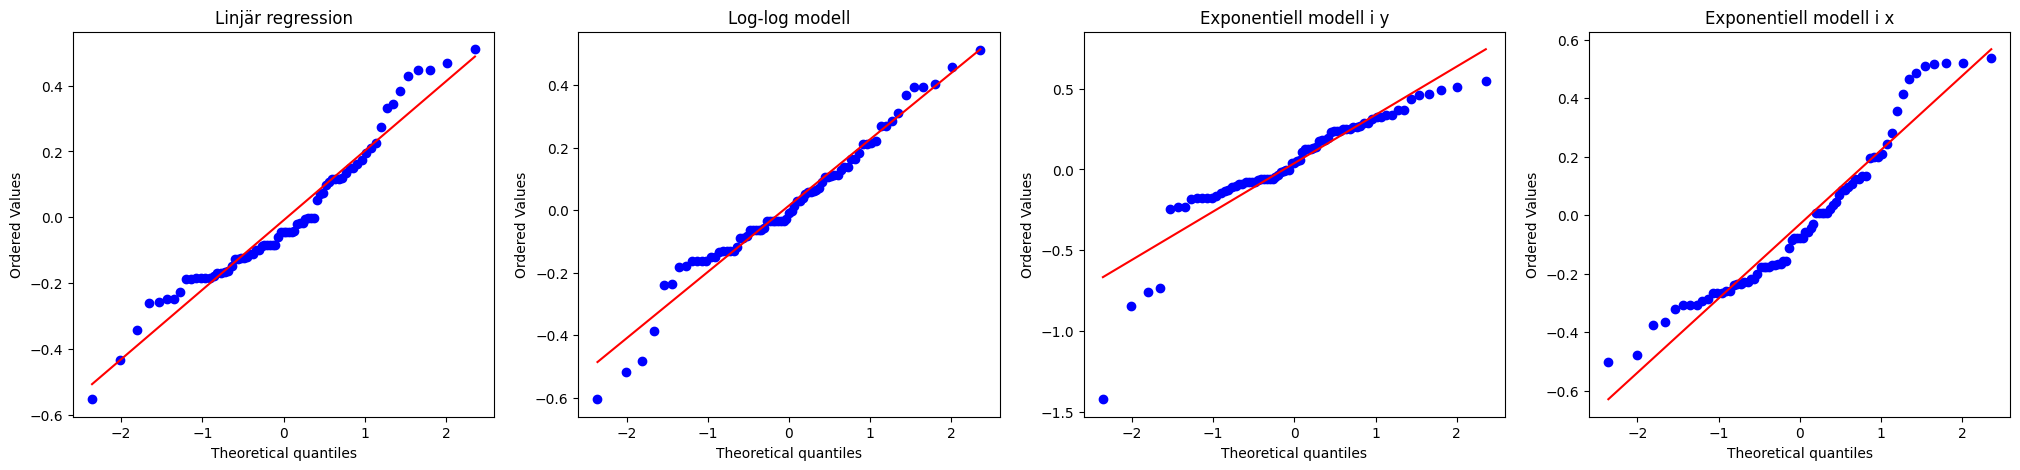

In [50]:
from scipy import stats

# QQ-plottar
plt.figure(figsize=(25, 5))

plt.subplot(1,4,1)
stats.probplot(test['petalwidth'] - model.predict(test[['petallength']]), dist="norm", plot=plt)
plt.title("Linjär regression")

plt.subplot(1,4,2)
stats.probplot(test['petalwidth'] - pred_log_log_back, dist="norm", plot=plt)
plt.title("Log-log modell")

plt.subplot(1,4,3)
stats.probplot(test['petalwidth'] - np.exp(pred_log_y), dist="norm", plot=plt)
plt.title("Exponentiell modell i y")

plt.subplot(1,4,4)
stats.probplot(test['petalwidth'] - pred_log, dist="norm", plot=plt)
plt.title("Exponentiell modell i x")

plt.show()

## Slutsats:

Från $R^2$, residual variansen och normalitetsplottarna (Q-Q) ser vi att log-log modellen och den linjära modellen är bäst. Dessa två modeller är dock svåra att dra någon slutsats kring vilken som är bäst.

Det vi kan observera är att den linjära modellen är enklare. Inom ingenjörsvetenskapen brukar vi ha ordspråket  "Keep it simple, stupid". Detta ordspråk uppmuntrar att man alltid ska välja den enklaste lösningen på ett problem, eftersom det oftast är den bästa och mest effektiva lösningen. Att försöka göra saker för komplicerade kan leda till förvirring, ineffektivitet och till och med felaktiga resultat. Därför är det alltid bäst att hålla det enkelt och fokusera på det viktigaste när man försöker lösa ett problem.

Med detta ordspråk i åtanke hade jag valt en vanlig `linjär regression` för att modellera datat. Detta eftersom den är enklare och ger samma resultat som log-log modellen.

# Polynomisk transformation 
<!-- # !!! OBS !!! Icke fungerande kod !!! -->



En polynomisk transformation är en transformation som använder en polynomfunktion. Detta kan användas för att göra data mer normalfördelad och bättre för linjär regression. Låt oss titta på ett exempel.

### Exempel

Ovan genererade vi slumpmässiga huspriser baserat på husstorlek. 
Då vi artificiellt generarde denna data vet vi att den kommer från en polynomisk funktion av grad 2:

$$y = ax^2 + bx + c$$

Låt oss se hur vi kan använda en polynomisk transformation för att göra data mer normalfördelad och bättre för linjär regression.


#### Bakomliggande tanke...

Om man tycker jag se ett samband likt ett specifikt polynom kan man transformera sin data med inversen av detta polynom. Man kommer då få data som ska vara mer normalfördelad och bättre för linjär regression. 

Den transformerade datan kan vi sedan anpassa en linjär regression. För att få tillbaka den ursprungliga datan kan vi sedan använda den ursprungliga polynomet.

Inversen av ett polynom är detsamma som lösningen på ekvationen:

$$0 = ax^2 + bx + c$$

Dessa lösningar kallas också polynomets rötter. 


####  

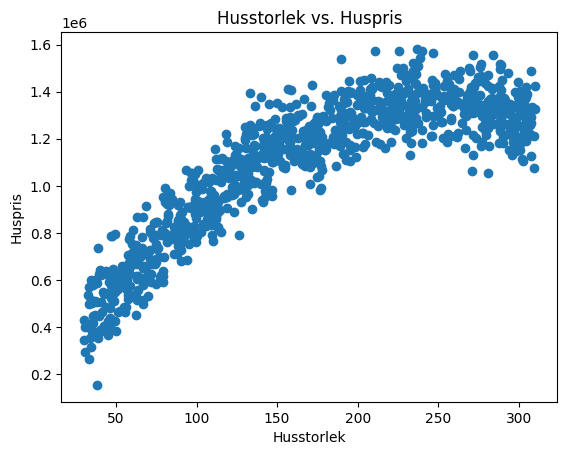

In [51]:
import matplotlib.pyplot as plt
import numpy as np

number_of_houses = 1000

# Generera slumpmässiga husstorlekar
hus_storlekar = np.random.uniform(low=30, high=310, size=(1,number_of_houses))

# Generera huspriser med hjälp av ett 2 gradens polynom
poly = np.array([-20, 10000, 100_000])
hus_priser = np.polyval(poly, hus_storlekar)

# Generera brus med hjälp av en normalfördelning
hus_pris_brus = np.random.normal(loc=0, scale=100_000, size=number_of_houses)

# Lägg till bruset till huspriserna
hus_priser += hus_pris_brus

# Skapa en scatterplot för husstorlekarna och huspriserna
plt.scatter(hus_storlekar, hus_priser)
plt.xlabel('Husstorlek')
plt.ylabel('Huspris')
plt.title('Husstorlek vs. Huspris')
plt.show()

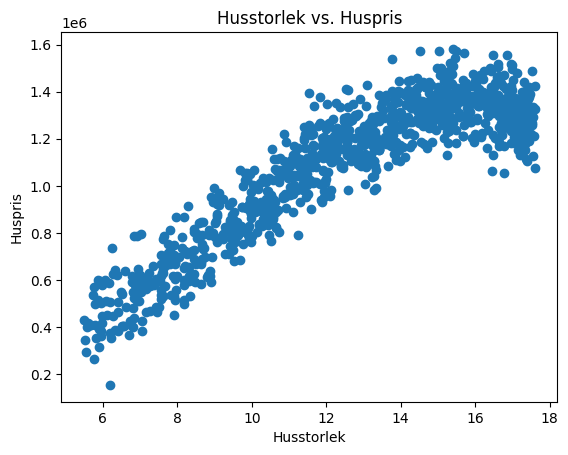

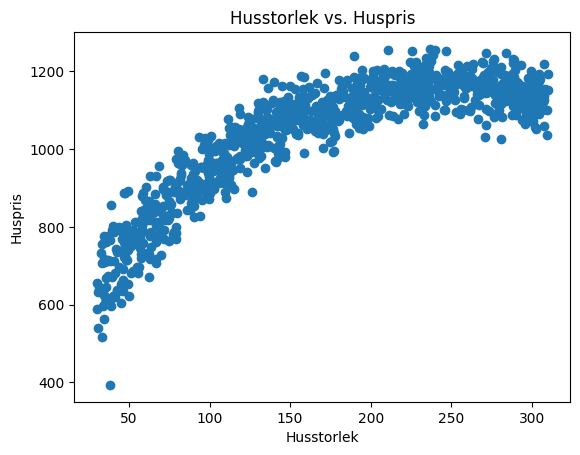

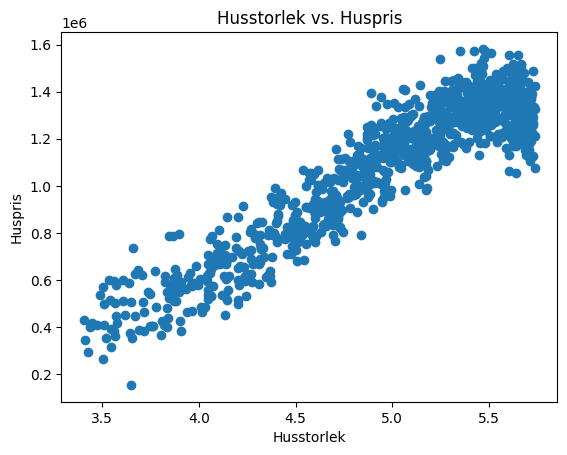

In [52]:
# Transformera data med kvadratroten
hus_storlekar_sqrt = np.sqrt(hus_storlekar)

# Skapa en scatterplot för husstorlekarna och huspriserna
plt.scatter(hus_storlekar_sqrt, hus_priser)
plt.xlabel('Husstorlek')
plt.ylabel('Huspris')
plt.title('Husstorlek vs. Huspris')
plt.show()

# Transformera med avseende på huspris
hus_priser_sqrt = np.sqrt(hus_priser)

# Skapa en scatterplot för husstorlekarna och huspriserna
plt.scatter(hus_storlekar, hus_priser_sqrt)
plt.xlabel('Husstorlek')
plt.ylabel('Huspris')
plt.title('Husstorlek vs. Huspris')
plt.show()


# Log transformation
hus_storlekar_log = np.log(hus_storlekar)

# Skapa en scatterplot för husstorlekarna och huspriserna
plt.scatter(hus_storlekar_log, hus_priser)
plt.xlabel('Husstorlek')
plt.ylabel('Huspris')
plt.title('Husstorlek vs. Huspris')
plt.show()



## TESTAR!!!!!!!!!!!!!

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Assuming hus_storlekar and hus_priser are your features and targets

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(hus_storlekar.reshape(-1, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly, hus_priser.reshape(-1, 1))

# Assuming hus_storlekar is (1, 1000) and pred is (1000, 1)
# Reshape pred to match hus_storlekar for plotting
pred_reshaped = pred.reshape(hus_storlekar.shape)

# Plot
plt.scatter(hus_storlekar, hus_priser)
plt.plot(hus_storlekar, pred_reshaped, color='red')
plt.xlabel('Husstorlek')
plt.ylabel('Huspris')
plt.title('Polynomial Regression Fit')
plt.show()


# Generate a range of house sizes (x-values)
x_range = np.linspace(hus_storlekar.min(), hus_storlekar.max(), num=300).reshape(-1, 1)

# Transform these x-values to polynomial features
X_range_poly = poly_features.transform(x_range)

# Use the model to predict y-values (house prices) for these x-values
y_pred_range = model.predict(X_range_poly)

# Plot original data
plt.scatter(hus_storlekar, hus_priser, label="Original Data")

# Plot model predictions
plt.plot(x_range, y_pred_range, color='red', label="Model Fit")

# Labeling the plot
plt.xlabel('Husstorlek')
plt.ylabel('Huspris')
plt.title('Model Fit on Polynomial Data')
plt.legend()
plt.show()


ValueError: cannot reshape array of size 75 into shape (1,1000)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming hus_storlekar and hus_priser are your input and output data

# Transform the data to polynomial features: x^2, x, and 1
X = np.vstack((hus_storlekar**2, hus_storlekar, np.ones_like(hus_storlekar))).T

# Compute the coefficients using the normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ hus_priser

# Extracting a, b, c from theta
a, b, c = theta.flatten()

print(f"Coefficients: a = {a}, b = {b}, c = {c}")

# Generate a range of house sizes for plotting
x_range = np.linspace(hus_storlekar.min(), hus_storlekar.max(), 300)

# Predict using the model
y_pred = a * x_range**2 + b * x_range + c

# Plotting
plt.scatter(hus_storlekar, hus_priser, label='Original Data')
plt.plot(x_range, y_pred, color='red', label='Manual Polynomial Fit')
plt.xlabel('Husstorlek')
plt.ylabel('Huspris')
plt.title('Manual Polynomial Regression Fit')
plt.legend()
plt.show()


## Slut på test!

In [ ]:
poly_guess = poly

x = (hus_priser - poly_guess[2]) / (poly_guess[0] * hus_storlekar**2 + poly_guess[1] * hus_priser)

plt.plot(x.T, '.')
# plt.show()

# Anpassa linear regression
from sklearn.linear_model import LinearRegression
model_x = LinearRegression()
model_x.fit(x.T, hus_priser.T)

# Prediktion
pred_x = model_x.predict(x.T)

print(f"Modellens koefficienter: {model_x.coef_}")
print(f"Modellens intercept: {model_x.intercept_}")

# Plotta anpassningen
plt.plot(x.T, '.')
plt.plot(pred_x)
plt.show()


$$ y = ax^2 + bx + c$$

In [ ]:

# Transformera tillbaka prediktionen
pred_x_back = x.T**2 * model_x.coef_ + x.T * model_x.intercept_ + poly_guess[2]

# Plotta anpassningen
plt.plot(hus_storlekar.T, hus_priser.T, '.')
plt.plot(hus_storlekar.T, pred_x_back)
plt.show()

print(pred_x_back)



$$ x = \frac{y - c}{a \cdot y^2 + b \cdot y}$$

In [ ]:
# Estimera huspriserna med hjälp av ett 2a gradens polynom
poly_guess = poly   # Använd samma polynom som vi genererade huspriserna med

x = (hus_priser - poly_guess[2]) / (poly_guess[0] * hus_storlekar**2 + poly_guess[1] * hus_priser)
print(x.shape)
# plt.scatter(hus_priser, x)
# plt.scatter(x,hus_priser)
plt.scatter(hus_storlekar, x)
plt.show()

# linjär regression till x
from sklearn.linear_model import LinearRegression
model_x = LinearRegression()
model_x.fit(hus_storlekar.reshape(-1, 1), x.reshape(-1, 1))

# prediktera x
pred_x = model_x.predict(hus_storlekar.reshape(-1, 1))

# visualisera prediktionen
plt.scatter(hus_storlekar, x)
plt.plot(hus_storlekar.T, pred_x, color='red')
plt.show()

# Applicera den predicerade x till polynomet
pred_x_poly = np.polyval(poly, pred_x)

plt.scatter(hus_storlekar, hus_priser)
plt.plot(hus_storlekar.T, pred_x_poly, color='red')
plt.show()




In [ ]:


# Beräkna rötterna till polynomet (lösningen till ax^2 + bx + c = 0)
roots = np.roots(poly_guess)
print(f"Lösningen till polynomet är: {roots}")

# Tillämpar polynomet på huspriserna 
inverse_polynomial = np.poly1d(roots)
y_guess = inverse_polynomial(hus_storlekar)

# Skapa en scatterplot för husstorlekarna och huspriserna
plt.scatter(hus_storlekar, y_guess)
plt.xlabel('Husstorlek')
plt.ylabel('Huspris')
plt.show()


Anpassa en linjär modell till den transformerade datan. Transformera sedan tillbaka prediktionen till den ursprungliga formen genom att applicera det ursprungliga polynomet. 

In [ ]:
from sklearn.linear_model import LinearRegression
# Skapa linjär modell av datan
model_poly_house = LinearRegression()
model_poly_house.fit(hus_storlekar.T, y_guess.T)

# Prediktera huspriserna med hjälp av linjär modellen
y_pred = model_poly_house.predict(hus_storlekar.T)

print(f"model koefficient: {model_poly_house.coef_}")

# Transformera huspriserna tillbaka till riktiga huspriser
y_pred_poly = np.polyval(poly_guess, y_pred)

xx = np.linspace(30, 300, 100)
yy = model_poly_house.predict(xx.reshape(-1, 1))


# Skapa en scatterplot för husstorlekarna och huspriserna
plt.plot(xx, yy, color='red', linewidth=3)
plt.scatter(hus_storlekar, hus_priser)
plt.xlabel('Husstorlek')
plt.ylabel('Huspris')
plt.show()

# Visa modell innan transformation
plt.plot(hus_storlekar.T, y_pred, color='red', linewidth=3)
plt.scatter(hus_storlekar, y_guess)
plt.xlabel('Husstorlek')
plt.ylabel('Huspris')
plt.show()





# Polynomial Regression


Polynom regression är en form av regression där man använder en polynomfunktion (en funktion som består av en summa av potenser av en variabel) för att bäst anpassa en given datamängd. Detta görs genom att hitta de koefficienter som minimerar avståndet mellan datapunkterna och funktionen. Detta görs oftast med hjälp av olika optimeringsalgoritmer.

En polynomfunktion kan skrivas på formen:

$$y = a_0 + a_1 \cdot x + a_2 \cdot x^2 + a_3 \cdot x^3 + ... + a_n \cdot x^n$$

där $a_0, a_1, a_2, ..., a_n$ är koefficienterna för polynomet och x är den variabel som funktionen är beroende av. N är det högsta potensen för x som finns i funktionen, och detta tal kallas ofta för graden på polynomet.

Genom att hitta rätt koefficienter för polynomet kan man använda funktionen för att göra prognoser och förklara samband i en given datamängd. Polynom regression kan vara användbart när man har en datamängd där det finns ett samband som inte är linjärt, då en linjär funktion inte alltid kan ge en bra anpassning till dessa data.

Coefficients: [ 4.29411261e-03  1.00575082e+00  3.49580493e-02 -1.99107636e-01
 -6.60043238e-04 -3.01979008e-02 -1.12758030e-02  4.60612659e-02
  3.78781073e-03 -1.69869557e-02 -3.88246511e-04  2.94272350e-03
  3.42718023e-06 -2.48826928e-04  8.77639822e-07  8.29942609e-06]
Mean squared error: 0.008675455105809537
Coefficient of determination r2: 0.9818001005679273


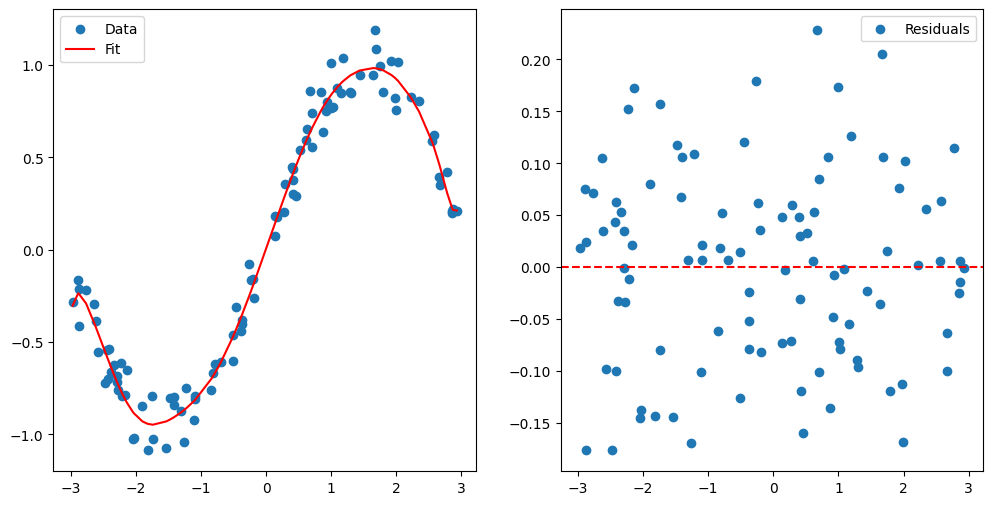

In [74]:
# Set the degree of the polynomial to fit
degree = 15

# Generate random data
np.random.seed(0)
x = np.random.uniform(-3, 3, size=100)
x.sort()
y = np.sin(x) + np.random.normal(0, 0.1, size=100)

# Generate polynomial features
X = np.column_stack([x**i for i in range(degree + 1)])

# Fit the model
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Generate predictions
y_pred = X.dot(beta)

# Print the model coefficients
print("Coefficients:", beta)

# Calculate the mean squared error
mse = np.mean((y_pred - y)**2)
print("Mean squared error:", mse)

# Calculate the coefficient of determination
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)
print("Coefficient of determination r2:", r2)

# Plot the results in a subplot with residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Plot the data
plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, label="Fit", color="red")
plt.legend()

# Plot the residuals
plt.subplot(1, 2, 2)
plt.scatter(x, y - y_pred, label="Residuals")
plt.axhline(0, color='r', linestyle='--')
plt.legend()

plt.show()

In [75]:
# Visa skillanden mellan residualens standardavvikelse och standardavvikelsen för datan samt standardavvikelsen för bruset vi adderade
print(f"Standardavvikelsen för datan: {np.std(y):.2f}")
print(f"Standardavvikelsen för bruset: {np.std(y - np.sin(x)):.2f}")
print(f"Standardavvikelsen för residualen: {np.std(y - y_pred):.2f}")

Standardavvikelsen för datan: 0.69
Standardavvikelsen för bruset: 0.10
Standardavvikelsen för residualen: 0.09


In [2]:
# !pip install ipywidgets
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Initial data
np.random.seed(0)
x = np.random.uniform(-3, 3, size=100)
x.sort()
y = np.sin(x) + np.random.normal(0, 0.1, size=100)

def interactive_plot(degree):
    # Limit the degree to a reasonable range
    degree = max(1, min(degree, 20))

    # Generate polynomial features
    X = np.column_stack([x ** i for i in range(degree + 1)])

    # Fit the model
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    # Generate predictions
    y_pred = X @ beta

    # Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, label='Data')
    plt.plot(x, y_pred, color='red', label=f'Polynomial Degree {degree}')
    plt.legend()

    # Plot residuals
    plt.subplot(1, 2, 2)
    plt.scatter(x, y - y_pred, label='Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.legend()
    plt.show()

# Create interactive widget
interactive_plot = interactive(interactive_plot, degree=(1, 20))
display(interactive_plot)


interactive(children=(IntSlider(value=10, description='degree', max=20, min=1), Output()), _dom_classes=('widg…

## Onödiga detaljer




In linear regression, we are trying to fit a model of the form:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n$$

where $y$ is the dependent variable, $x_1, x_2, \dots, x_n$ are the independent variables, and $\beta_0, \beta_1, \beta_2, \dots, \beta_n$ are the coefficients of the model. The goal is to find the values of the coefficients that best fit the data.

To solve for the coefficients, we can use a method called least squares regression. This method minimizes the sum of the squared differences between the observed values of the dependent variable and the predicted values of the dependent variable based on the model.

In other words, we are trying to find the values of the coefficients that minimize the following quantity:

$$\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

where $y_i$ is the observed value of the dependent variable for the $i$th data point, and $\hat{y}_i$ is the predicted value of the dependent variable for the $i$th data point based on the model.

To solve for the coefficients using least squares regression, we can set the partial derivative of this quantity with respect to each coefficient to zero and solve the resulting system of equations. This gives us the following system of equations:

$$\begin{aligned} \frac{\partial}{\partial \beta_0} \sum_{i=1}^n (y_i - \hat{y}i)^2 &= 0 \ \frac{\partial}{\partial \beta_1} \sum{i=1}^n (y_i - \hat{y}i)^2 &= 0 \ \vdots \ \frac{\partial}{\partial \beta_n} \sum{i=1}^n (y_i - \hat{y}_i)^2 &= 0 \end{aligned}$$

To solve this system of equations, we can use a variety of techniques, such as the method of normal equations. This method involves multiplying both sides of the system of equations by the transpose of the design matrix and rearranging the terms to give:

$$\begin{aligned} \beta_0 \mathbf{1}^T + \beta_1 \mathbf{x}_1^T + \beta_2 \mathbf{x}_2^T + \dots + \beta_n \mathbf{x}_n^T &= \mathbf{y}^T \ \left( \beta_0 \mathbf{1}^T + \beta_1 \mathbf{x}_1^T + \beta_2 \mathbf{x}_2^T + \dots + \beta_n \mathbf{x}_n^T \right) \mathbf{1} &= \mathbf{y}^T \mathbf{1} \ \left( \beta_0 \mathbf{1}^T + \beta_1 \mathbf{x}_1^T + \beta_2 \mathbf{x}_2^T + \dots + \beta_n \mathbf{x}_n^T \right) \mathbf{x}_1
\end{aligned}$$


To continue the derivation, we can multiply both sides of the equation by the inverse of the matrix $\mathbf{X}^T \mathbf{X}$, where $\mathbf{X}$ is the design matrix. This gives us the following solution for the coefficients:

$$\begin{aligned} \beta &= \left( \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^T \mathbf{y} \end{aligned}$$

where $\beta$ is a column vector containing the values of the coefficients, and $\mathbf{y}$ is a column vector containing the observed values of the dependent variable.

This equation shows how to solve for the coefficients of a linear regression model using the method of normal equations and least squares regression. It can be implemented in code using numpy's linear algebra functions, as shown in the previous examples.